In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
trainCopy=train.copy()
testCopy=test.copy()
train=shuffle(train)

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
13095,54397,Technology,region_23,Bachelor's,f,other,1,30,NaN,1,0,0,80,0
37673,36194,Finance,region_5,Bachelor's,m,sourcing,1,36,5.0,3,1,0,62,0
24431,46586,Procurement,region_2,Master's & above,f,other,1,42,3.0,13,0,0,67,0
32131,37354,Sales & Marketing,region_31,Bachelor's,m,other,2,27,3.0,4,0,0,49,0
44460,62993,Operations,region_26,Bachelor's,f,sourcing,1,25,NaN,1,0,0,61,0


In [4]:
train.drop(['employee_id'],axis=1,inplace=True)
test.drop(['employee_id'],axis=1,inplace=True)
train.shape,test.shape

((54808, 13), (23490, 12))

In [5]:
train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [6]:
train.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64

In [7]:

labels = train['recruitment_channel'].astype('category').cat.categories.tolist()
recChannelMap = {'recruitment_channel' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

labels = train['department'].astype('category').cat.categories.tolist()
departmentMap = {'department' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

labels = train['region'].astype('category').cat.categories.tolist()
regionMap = {'region' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}



In [8]:
train.replace(departmentMap, inplace=True)
train.replace(regionMap, inplace=True)

train.replace(recChannelMap, inplace=True)


test.replace(departmentMap, inplace=True)
test.replace(regionMap, inplace=True)

test.replace(recChannelMap, inplace=True)

In [9]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
13095,9,16,Bachelor's,f,1,1,30,NaN,1,0,0,80,0
37673,2,30,Bachelor's,m,3,1,36,5.0,3,1,0,62,0
24431,6,12,Master's & above,f,1,1,42,3.0,13,0,0,67,0
32131,8,25,Bachelor's,m,1,2,27,3.0,4,0,0,49,0
44460,5,19,Bachelor's,f,3,1,25,NaN,1,0,0,61,0


In [10]:
# filling nan values in education 


In [11]:
train['previous_year_rating']=train['previous_year_rating'].fillna(train.previous_year_rating.mode()[0])
train['education'] = train['education'].fillna(train['education'].mode()[0])

test['previous_year_rating']=test['previous_year_rating'].fillna(test.previous_year_rating.mode()[0])
test['education'] = test['education'].fillna(test['education'].mode()[0])

In [12]:
train.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [13]:
train.education.unique()

array(["Bachelor's", "Master's & above", 'Below Secondary'], dtype=object)

In [14]:
# encoding education 

education_mapper = {"Master's & above":3, "Bachelor's":2,"Below Secondary":1}
gender_mapper = {"m":1, "f":2}

In [15]:
train['education_scaled'] = train['education'].replace(education_mapper)
test['education_scaled'] = test['education'].replace(education_mapper)
train['education']=train['education_scaled']
train.drop(['education_scaled'],axis=1,inplace=True)

train['gender'] = train['gender'].replace(gender_mapper)
test['gender'] = test['gender'].replace(gender_mapper)


test['education']=test['education_scaled']
test.drop(['education_scaled'],axis=1,inplace=True)

In [16]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
13095,9,16,2,2,1,1,30,3.0,1,0,0,80,0
37673,2,30,2,1,3,1,36,5.0,3,1,0,62,0
24431,6,12,3,2,1,1,42,3.0,13,0,0,67,0
32131,8,25,2,1,1,2,27,3.0,4,0,0,49,0
44460,5,19,2,2,3,1,25,3.0,1,0,0,61,0


In [17]:
train.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,5.972796,16.428970,2.257627,1.297621,1.868158,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,2.506046,8.764954,0.469717,0.457216,0.980713,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,5.000000,12.000000,2.000000,1.000000,1.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,6.000000,15.000000,2.000000,1.000000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,8.000000,22.000000,3.000000,2.000000,3.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,9.000000,34.000000,3.000000,2.000000,3.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [18]:
train['joining_age']=train['age']-train['length_of_service']
test['joining_age']=test['age']-test['length_of_service']

train['training_hours']=train['no_of_trainings']*train['avg_training_score']
test['training_hours']=test['no_of_trainings']*test['avg_training_score']

# Data visualisation 

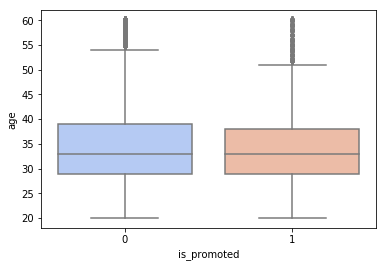

In [19]:
# age distribution 
sns.boxplot(x="is_promoted",y="age",data=train, palette="coolwarm")

(array([  870.,  7031., 13751., 12531.,  8300.,  5093.,  2861.,  1908.,
         1322.,  1141.]),
 array([20., 24., 28., 32., 36., 40., 44., 48., 52., 56., 60.]),
 <a list of 10 Patch objects>)

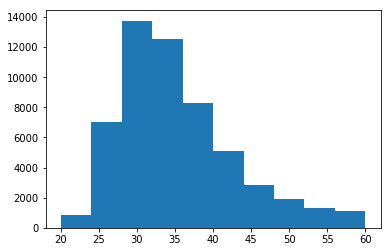

In [20]:
plt.hist(train.age)


we can observe that the age of most of the people are in range of 30-38 and there is very less number of people in lower and higher age group

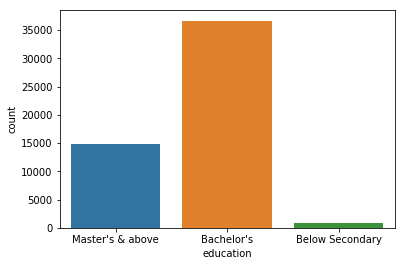

In [21]:
#plt.hist(train.education)
sns.countplot(x="education", data=trainCopy)


The education trend shows that most of the employees are Bachelor(2) and very less of them are below seconday
some of the employees are having masters and above too(1)

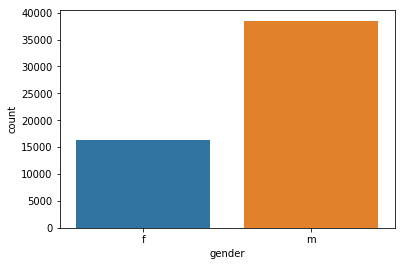

In [22]:
sns.countplot(x="gender", data=trainCopy)


1 is for males and 2 is for females

(array([  606., 11397.,  8466., 10883.,  4571.,  4652.,  4915.,  7154.,
         1801.,   363.]),
 array([39., 45., 51., 57., 63., 69., 75., 81., 87., 93., 99.]),
 <a list of 10 Patch objects>)

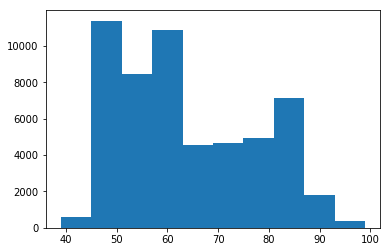

In [23]:
plt.hist(train.avg_training_score)
#sns.countplot(x="avg_training_score", data=train)


most of the employees are having score between 40 to 60 while some are having scores aove 80 with large no of employees 

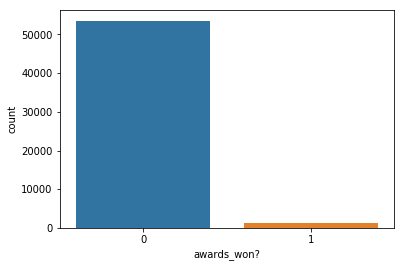

In [24]:
#plt.hist(train['awards_won?'])

sns.countplot(x="awards_won?", data=trainCopy)

very less number of employee got awards 

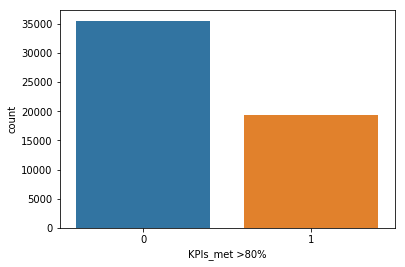

In [25]:
#plt.hist(train['KPIs_met >80%'])
sns.countplot(x="KPIs_met >80%", data=train)


(array([2.510e+04, 1.900e+04, 5.738e+03, 2.623e+03, 1.372e+03, 5.960e+02,
        2.270e+02, 9.600e+01, 5.100e+01, 5.000e+00]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ]),
 <a list of 10 Patch objects>)

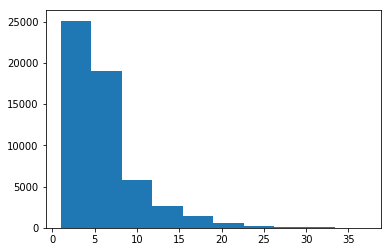

In [26]:
plt.hist(train['length_of_service'])


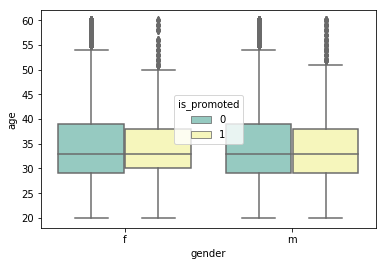

In [27]:
sns.boxplot(x="gender", y="age", hue="is_promoted",data=trainCopy, palette="Set3")

distribution of promotion with age and gender

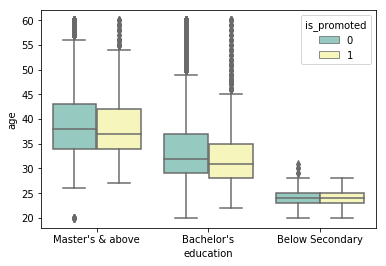

In [28]:
sns.boxplot(x="education", y="age", hue="is_promoted",data=trainCopy, palette="Set3")

we can observe that the employees having age above 35 are mostly in the higher education
and people below 25 are in the below secondary education group

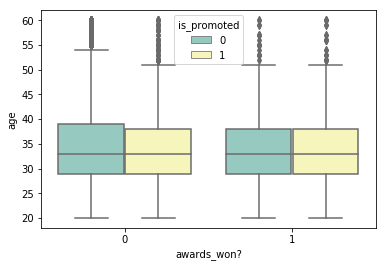

In [29]:
sns.boxplot(x="awards_won?", y="age", hue="is_promoted",data=train, palette="Set3")

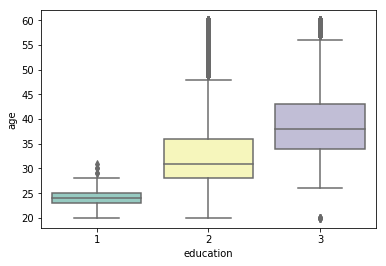

In [30]:
sns.boxplot(x="education", y="age",data=train, palette="Set3")

we can observe that most of the lower age people are in the lowest educated group
while the people in higher age group are having higher education

In [31]:

#sns.boxplot(data=train, orient="h", palette="Set2")

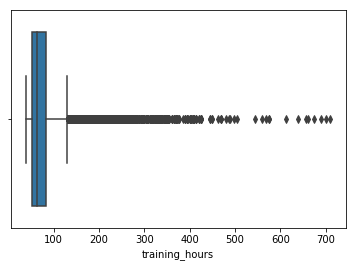

In [32]:
sns.boxplot(train.training_hours)

In [33]:
train.shape

(54808, 15)

Text(0, 0.5, 'training score')

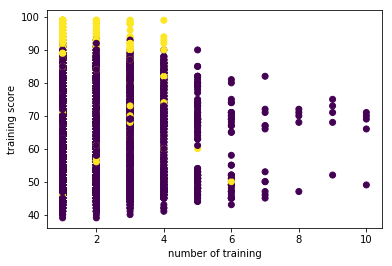

In [34]:
plt.scatter(train.no_of_trainings,train.avg_training_score,c=train.is_promoted)
plt.xlabel("number of training")
plt.ylabel("training score")

Text(0, 0.5, 'training score')

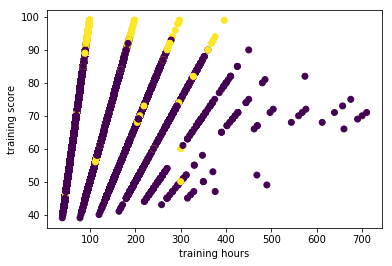

In [35]:
plt.scatter(train.training_hours,train.avg_training_score,c=train.is_promoted)
plt.xlabel("training hours")
plt.ylabel("training score")

we can observe that the training score is related to promotion as more the training score more is the chance to be promoted
also the training hours are linearly related to training score 

Text(0, 0.5, 'rating ')

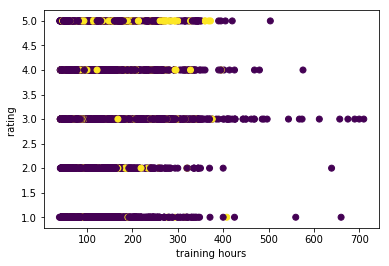

In [36]:
plt.scatter(train.training_hours,train.previous_year_rating,c=train.is_promoted)
plt.xlabel("training hours")
plt.ylabel("rating ")

Similarly the people with high rating (5) are more in the promoted category as comapred to the low rating

We can observe that the training hours are having outliers which are above 500 

In [37]:
train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'joining_age', 'training_hours'],
      dtype='object')

In [38]:

train_new = train.loc[(train['training_hours'] < 500)]


In [39]:
train.shape

(54808, 15)

In [40]:
train_new.shape

(54794, 15)

Text(0, 0.5, "rating previous year's")

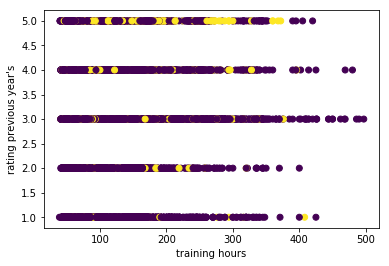

In [41]:
plt.scatter(train_new.training_hours,train_new.previous_year_rating,c=train_new.is_promoted)
plt.xlabel("training hours")
plt.ylabel("rating previous year's")

Text(0, 0.5, 'age')

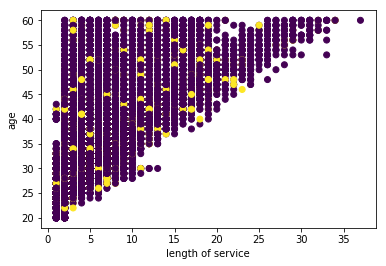

In [42]:
plt.scatter(train_new.length_of_service,train_new.age,c=train_new.is_promoted)
plt.xlabel("length of service")
plt.ylabel("age")

In [43]:
corr = train_new.corr()
corr.style.background_gradient()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,joining_age,training_hours
department,1,-0.0205831,0.0525199,0.0300789,0.00470539,0.0141917,0.0791926,-0.13557,0.0590711,-0.0882498,-0.00214735,-0.251675,0.000137632,0.060889,-0.0990469
region,-0.0205831,1,0.00107494,-0.0197199,-0.000909407,-0.00412443,-0.0888654,-0.00596223,-0.058905,-0.00767986,0.000300887,0.0236155,0.00882962,-0.073732,0.00537208
education,0.0525199,0.00107494,1,0.0243224,-0.00550175,-0.0341874,0.389023,0.026813,0.266967,0.00669485,0.00047081,0.0256443,0.0280347,0.316109,-0.0223498
gender,0.0300789,-0.0197199,0.0243224,1,-0.0065175,-0.0849659,0.0162814,0.0239546,0.0196625,0.0372766,-0.00239503,0.0245147,0.0110839,0.00701238,-0.0666518
recruitment_channel,0.00470539,-0.000909407,-0.00550175,-0.0065175,1,-0.0132103,-0.0111946,0.00582217,-0.00276957,-0.000311434,-0.0054773,-0.00255659,0.00229637,-0.0126943,-0.0125065
no_of_trainings,0.0141917,-0.00412443,-0.0341874,-0.0849659,-0.0132103,1,-0.0832286,-0.0614928,-0.0574872,-0.0457443,-0.00729018,0.0415526,-0.0244231,-0.067357,0.897948
age,0.0791926,-0.0888654,0.389023,0.0162814,-0.0111946,-0.0832286,1,0.0267774,0.657203,-0.0255882,-0.0081694,-0.048379,-0.0171674,0.833844,-0.0928871
previous_year_rating,-0.13557,-0.00596223,0.026813,0.0239546,0.00582217,-0.0614928,0.0267774,1,0.0234658,0.337316,0.0265749,0.0719751,0.153219,0.0180309,-0.0111948
length_of_service,0.0590711,-0.058905,0.266967,0.0196625,-0.00276957,-0.0574872,0.657203,0.0234658,1,-0.0777347,-0.0399431,-0.0380792,-0.0106946,0.131956,-0.0668001
KPIs_met >80%,-0.0882498,-0.00767986,0.00669485,0.0372766,-0.000311434,-0.0457443,-0.0255882,0.337316,-0.0777347,1,0.0970059,0.0784001,0.221599,0.0232783,-0.00305845


Observing the correlation matrix of the data we can see that

1.education is inversely realted to promotion, ie highly educated people are least promoted as we have encoded it we have to change and reverse the logic as logically highly educated people should be promoted more.
education_mapper = {"Master's & above":3, "Bachelor's":2,"Below Secondary":1}

2.gender also affects the promotion as most of the males are promoted as compared to females.


3.No. of trainings affects the chances of promotion as more number of trainings requred ,the employee can be assumed having low grasping power.


4.Age realtion is negative, means older people have less chances of promotion which was observed from plots too.


5.Previous years rating, awards won and KPI's met ?80% are employee's performance parameter and affects the promotion chances with positive corr coeff.


6.joining age have negative corr while training hours have + corr.

# checking hypothesis

In [44]:
pd.crosstab(train_new["education"],train_new["is_promoted"],margins=True)


is_promoted,0,1,All
education,,,
1,738,67,805
2,35938,3130,39068
3,13450,1471,14921
All,50126,4668,54794


In [45]:
pd.crosstab(train_new["gender"],train_new["is_promoted"],margins=True)


is_promoted,0,1,All
gender,,,
1,35283,3201,38484
2,14843,1467,16310
All,50126,4668,54794


gender map is 1=male, 2 = female we can observe  (8 % of women are promoted)
while same 8 % of men are promoted 

In [46]:
pd.crosstab(train_new["no_of_trainings"],train_new["is_promoted"],margins=True)

is_promoted,0,1,All
no_of_trainings,,,
1,40468,3910,44378
2,7382,605,7987
3,1654,122,1776
4,442,26,468
5,125,3,128
6,42,2,44
7,10,0,10
8,1,0,1
9,1,0,1


we can observe that lesser the number of training more is the chance of getting promoted

In [47]:
pd.crosstab(train_new["age"],train_new["is_promoted"],margins=True)

is_promoted,0,1,All
age,,,
20,109,4,113
21,93,5,98
22,213,18,231
23,394,34,428
24,775,70,845
25,1230,69,1299
26,1894,163,2057
27,2565,261,2826
28,2838,308,3146


people in age range 26-40 are more likely to be prmoted than of other age group

In [48]:
pd.crosstab(train_new["previous_year_rating"],train_new["is_promoted"],margins=True)

is_promoted,0,1,All
previous_year_rating,,,
1.0,6133,88,6221
2.0,4043,181,4224
3.0,21039,1694,22733
4.0,9092,784,9876
5.0,9819,1921,11740
All,50126,4668,54794


16.3% of 5 star

7.9 % of 4 star

7.4% of 3 star

4.2% of 2 star

1.4 % of 1 star 





In [49]:

pd.crosstab(train_new["awards_won?"],train_new["is_promoted"],margins=True)

is_promoted,0,1,All
awards_won?,,,
0,49415,4109,53524
1,711,559,1270
All,50126,4668,54794


559/1270 = 44% of the people who got award are promoted

4109/53524 = 7.6 % of the people who were not awarded got promoted

# Feature selection 

As the data is imbalnce we have to apply certain techniques for making the model fit accurately for the imbalance output
as the data contains large number of target variables labled as 0, it will try to predict 0 for most of the cases.
we will do the feature selection before any over/undersampling technique because as we over/ undersample , the feature importance may 
change from the original importance of the feature.

Oversampling the minority class with SMOTE violates the independence assumption.